<b> Final Project I590 Part I - Danny Rigdon </b>



In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
#load data file
bcw = pd.read_csv('Breast-Cancer-Wisconsin.csv')

In [3]:
#print some of the datafile out to ensure it loaded and see if it looks appropriate
bcw

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
#Replace ? by NaN in column A7. 
bcw['A7'] = bcw['A7'].replace('?', np.NaN)

In [5]:
#column needs to be converted back to numeric. 
bcw['A7'] = pd.to_numeric(bcw['A7'], errors='coerce')

In [6]:
#Report how many NaN. Use isnull() function applied to the dataframe. 
bcw.isnull()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Then you can use arithmetic sum(). 
#[Remember to use print() statement to report]
print(bcw['A7'].isnull().sum())

16


In [8]:
#Replace NaN values with the mean of column A7. Use fillna() - find how to calculate mean of the column, 
#add a parameter skipna=TRUE. Apply this function to the entire df - you do not need to specify here column A7

#add column wise fill na prior to applying the mean

bcw.mean(skipna=True)

Scn      1.071704e+06
A2       4.417740e+00
A3       3.134478e+00
A4       3.207439e+00
A5       2.806867e+00
A6       3.216023e+00
A7       3.544656e+00
A8       3.437768e+00
A9       2.866953e+00
A10      1.589413e+00
CLASS    2.689557e+00
dtype: float64

In [9]:
bcw = bcw.fillna(bcw.mean(skipna=True, numeric_only=True))

In [10]:
#summary statistics 
bcw.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
#Find number of columns and number of rows
bcw.shape

(699, 11)

In [12]:
#Report how many unique id values (column Scn) - hint the length of unique ids
len(bcw['Scn'])

699

In [13]:
#print out column titles to see where to subset
bcw.columns

Index(['Scn', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS'], dtype='object')

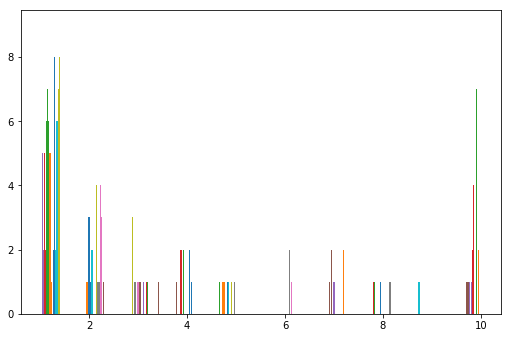

In [17]:
#Draw histograms for columns A2-A10
bcw_subset = bcw[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]
plt.hist(bcw_subset, bins=20)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

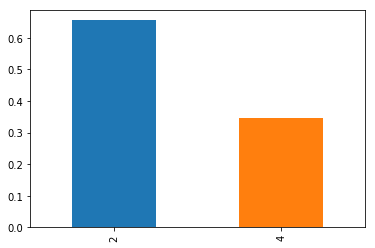

In [24]:
#Draw a bar plot for CLASS - you can use groupby to see counts of benign and malignant values or you can count 
#values directly using pd.value_counts() function and apply it to plot.bar() function.
bcw['CLASS'].value_counts('CLASS').plot(kind = "bar")

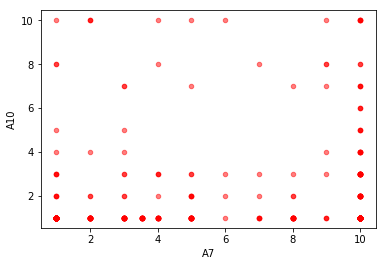

In [41]:
 #Draw a scatterplot of any two columns. 
bcw.plot.scatter('A7','A10', c='red', alpha = 0.5)

In [ ]:
#Summarize by reporting which values might need standardization in the future (too much variation) and any other 
#observations that you may discover as a Data Scientist.
